In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import os
import random
import matrixprofile as mp
import matplotlib.gridspec as gridspec
from sklearn import preprocessing
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import statistics
from collections import Counter
import pyarrow as pa
import pyarrow.parquet as pq
import os
from collections import OrderedDict
import scipy.stats
sns.set_style("whitegrid")

In [2]:
tempTopDir = '/Volumes/Britt_SSD/ReDoEvals3/UserStudy/'
filePath = os.path.join(tempTopDir, 'GP_Main.parquet')

In [3]:
taskDF = pd.read_parquet(filePath)
taskDF['ParticipantNum'] = taskDF["ParticipantPrivateID"]
taskDF = taskDF.astype({"ParticipantPrivateID": str})
filePath = os.path.join(tempTopDir, 'GP_Main_Short.parquet')
slimDF = pd.read_parquet(filePath)

In [4]:
notSus = slimDF.query('AmtPaid==7 & Suspicious!="Y" & Suspicious!="YES: PAID HALF" & Suspicious!="YES - DO NOT PAY"')

In [5]:
filePath = os.path.join(tempTopDir, 'GP_Consent_Long.parquet')
consentDF_L = pd.read_parquet(filePath).infer_objects()
consentDF_L = consentDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_L = consentDF_L[consentDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Consent_Short.parquet')
consentDF_S = pd.read_parquet(filePath).infer_objects()
consentDF_S = consentDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
consentDF_S = consentDF_S[consentDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Long.parquet')
demoDF_L = pd.read_parquet(filePath).infer_objects()
demoDF_L = demoDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_L = demoDF_L[demoDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_Demographics_Short.parquet')
demoDF_S = pd.read_parquet(filePath).infer_objects()
demoDF_S = demoDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
demoDF_S = demoDF_S[demoDF_S['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Long.parquet')
aiDF_L = pd.read_parquet(filePath).infer_objects()
aiDF_L = aiDF_L.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_L = aiDF_L[aiDF_L['ParticipantPrivateID'].notna()]

filePath = os.path.join(tempTopDir, 'GP_AI_Short.parquet')
aiDF_S = pd.read_parquet(filePath).infer_objects()
aiDF_S = aiDF_S.astype({"ParticipantPrivateID": str})
# drop rows where NAN in participant private id
aiDF_S = aiDF_S[aiDF_S['ParticipantPrivateID'].notna()]

In [6]:


# drop particpants who have not been accepted (rejected or timed out)
# options: approved, awaiting review,rejected, returned, timed-out
print(slimDF.ExperimentVersion.unique())
print(slimDF.status.unique())
# get names of indexes for which to drop
pID_removed1 = slimDF[(slimDF['status']=='REJECTED') | 
                      (slimDF['status']=='RETURNED')].ParticipantPublicID.unique()
pID_removed2 = slimDF[(slimDF['status']=='RETURNED')].ParticipantPublicID.unique()
index_names = slimDF[(slimDF['status']!='AWAITING REVIEW') & (slimDF['status']!='APPROVED')].index
  
# drop these given row
# indexes from dataFrame
slimDF = slimDF[~slimDF['ParticipantPublicID'].isin(pID_removed2)].copy()
tmp_slimDF = slimDF[~slimDF['ParticipantPublicID'].isin(pID_removed1)].copy()
print(tmp_slimDF.status.unique())
print(pID_removed1)
    
tmp_demoDF_L = demoDF_L[~demoDF_L['ParticipantPublicID'].isin(pID_removed1)].copy()
tmp_demoDF_S = demoDF_S[~demoDF_S['ParticipantPublicID'].isin(pID_removed1)].copy()

tmp_consentDF_L = consentDF_L[~consentDF_L['ParticipantPublicID'].isin(pID_removed1)].copy()
tmp_consentDF_S = consentDF_S[~consentDF_S['ParticipantPublicID'].isin(pID_removed1)].copy()

tmp_aiDF_L = aiDF_L[~aiDF_L['ParticipantPublicID'].isin(pID_removed1)].copy()
tmp_aiDF_S = aiDF_S[~aiDF_S['ParticipantPublicID'].isin(pID_removed1)].copy()

tmp_taskDF = taskDF[~taskDF['ParticipantPublicID'].isin(pID_removed1)].copy()

print(tmp_taskDF[tmp_taskDF['ParticipantPublicID']==pID_removed1[-3]])

[60. 62. 64. 65. 67. 70. 72. 73. 76. 77.]
['APPROVED' 'RETURNED' 'REJECTED']
['APPROVED']
['5f5b7c0c291dc62b000bb637' '5f57a42b46df8927414990fc'
 '601f23aa1dc6d94683bde1ff' '5fcb5f768c4bb789f899288f'
 '60342dbfcf15a5092cda30dc' '5bce1cf2ac6b660001908ab8'
 '5f102f0212ea4f000a8ac9da' '600ac30a0e8a51025de63b95'
 '5f40d6c251a8cd21d01b6f40' '6034f9fe12d7b21679665d41'
 '5eccd97f6ce039000b2a61f2' '5ca14d419ca7f60017258fc6'
 '5f8dcac25e91d312a21a625f']
Empty DataFrame
Columns: [EventIndex, UTCTimestamp, UTCDate, LocalTimestamp, LocalTimezone, LocalDate, ExperimentID, ExperimentVersion, TreeNodeKey, RepeatKey, ScheduleID, ParticipantPublicID, ParticipantPrivateID, ParticipantStartingGroup, ParticipantStatus, ParticipantCompletionCode, ParticipantExternalSessionID, ParticipantDeviceType, ParticipantDevice, ParticipantOS, ParticipantBrowser, ParticipantMonitorSize, ParticipantViewportSize, Checkpoint, TaskName, TaskVersion, VisCond_DIFF, AgentCond_BlurVis_DIFF, AgentCond_Vis_DIFF, AgentCond_Blur_

In [8]:
# Also weight down if very short answers to text questions
from statistics import mean

taskDF['writtenLen'] = taskDF['Response'].str.len()

tmp = taskDF.query('ZoneType=="response_text_area"')

print(len(tmp))

ls = []

Short_pIDs = []
Long_pIDs = []

for p_index, pID in enumerate(tmp.ParticipantPublicID.unique()):
    temp = tmp[tmp['ParticipantPublicID']==pID]
    ls.append(temp.writtenLen.mean())
    
    if (temp.writtenLen.mean()<=17.65999955070231):
        Short_pIDs.append(pID)
    if (temp.writtenLen.mean()>=(62.92354227405248+49.78989699568519)):
        Long_pIDs.append(pID)
    
print("Min:")
print(min(ls))
print("Max:")
print(max(ls))
print("Mean:")
print(mean(ls))
print("std")
print(np.std(ls)*1.1)
print("one below:")
print(mean(ls)-(np.std(ls)))

count = len([i for i in ls if i <= mean(ls)-(np.std(ls)*1.1)])
print("How many below one std dev of mean?")
print(count)
print([i for i in ls if i <= mean(ls)-(np.std(ls)*1.1)])

count = len([i for i in ls if i >= mean(ls)+(np.std(ls))])
print("How many above one std dev of mean?")
print(count)

# weight down short answers
# tmp_taskDF['Quality3'] = np.where(tmp_taskDF['ParticipantPrivateID'].isin(Short_pIDs), 1, tmp_taskDF['Quality3'])
tmp_slimDF['Quality Rating(1-10)'] = np.where(tmp_slimDF['ParticipantPublicID'].isin(Short_pIDs), 0, tmp_slimDF['Quality Rating(1-10)'])

2191
Min:
8.5
Max:
366.0
Mean:
62.92354227405248
std
49.78989699568519
one below:
17.65999955070231
How many below one std dev of mean?
6
[8.5, 12.375, 11.0, 13.0, 9.0, 13.125]
How many above one std dev of mean?
26


In [12]:
print(Short_pIDs)

Long_taskDF = taskDF[taskDF['ParticipantPublicID'].isin(Long_pIDs)]
Long_slimDF = slimDF[slimDF['ParticipantPublicID'].isin(Long_pIDs)]


TooShort_taskDF = taskDF[taskDF['ParticipantPublicID'].isin(Short_pIDs)]
TooShort_slimDF = slimDF[slimDF['ParticipantPublicID'].isin(Short_pIDs)]

NotTooShort_taskDF = tmp_taskDF[~tmp_taskDF['ParticipantPublicID'].isin(Short_pIDs)]
NotTooShort_slimDF = tmp_slimDF[~tmp_slimDF['ParticipantPublicID'].isin(Short_pIDs)]

tmp2 = TooShort_taskDF.query('ZoneType=="response_text_area"')

# for pID in tmp2.ParticipantPublicID.unique():
#     tmp3 = tmp2[tmp2['ParticipantPublicID']==pID]
#     print(tmp3[['ParticipantPublicID','Response']])

['5faaf11bd8a7fc52c1e6eef8', '5f653485fa6c900b6548f35c', '5d5bb3b06e5a7700188c2f25', '5ed2543942283e0366dadbdc', '5f5da2ab2f9ff75f6885aa4a', '5bb20c4ce05c350001ef337e', '5c7e019bbd99f10015b7a23f', '5b7968dc56b1e00001b90f0d', '5d2a1ea859143a0019d3cc60', '5c90d58b1bfaba0016dc35f0']


In [13]:
# What if we drop those who missed 2 or more atn checks?
print(tmp_slimDF.Suspicious.unique())

paidAttn = tmp_slimDF.query('Suspicious != "Missed2" & Suspicious != "Missed1"')
NotPaidAttn = tmp_slimDF.query('Suspicious == "Missed2" | Suspicious == "Missed1"')

['Missed2' None 'Y' 'YES - DO NOT PAY' 'YES: PAID HALF' 'Missed1' 'Y ']


In [71]:
# Make lists and Dfs for: less than 40%, at least 99%, and at least 120%

thisDF = tmp_slimDF.copy()

ls30 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<=30):
        ls30.append(pID) 
Only30 = tmp_taskDF[tmp_taskDF['ParticipantPublicID'].isin(ls30)].copy()
Only30_S = tmp_slimDF[tmp_slimDF['ParticipantPublicID'].isin(ls30)].copy()

ls40 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<=40):
        ls40.append(pID) 
Only40 = tmp_taskDF[tmp_taskDF['ParticipantPublicID'].isin(ls40)].copy()
Only40_S = tmp_slimDF[tmp_slimDF['ParticipantPublicID'].isin(ls40)].copy()

ls50 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<=50):
        ls50.append(pID) 
Only50 = tmp_taskDF[tmp_taskDF['ParticipantPublicID'].isin(ls50)].copy()
Only50_S = tmp_slimDF[tmp_slimDF['ParticipantPublicID'].isin(ls50)].copy()

ls75 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<=75):
        ls75.append(pID) 
Only75 = tmp_taskDF[tmp_taskDF['ParticipantPublicID'].isin(ls75)].copy()
Only75_S = tmp_slimDF[tmp_slimDF['ParticipantPublicID'].isin(ls75)].copy()

ls99 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<99):
        ls99.append(pID) 
AtLeast99 = tmp_taskDF[~tmp_taskDF['ParticipantPublicID'].isin(ls99)].copy()
AtLeast99_S = tmp_slimDF[~tmp_slimDF['ParticipantPublicID'].isin(ls99)].copy()

ls110 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<110):
        ls110.append(pID) 
AtLeast110 = tmp_taskDF[~tmp_taskDF['ParticipantPublicID'].isin(ls110)].copy()
AtLeast110_S = tmp_slimDF[~tmp_slimDF['ParticipantPublicID'].isin(ls110)].copy()


ls120 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<120):
        ls120.append(pID) 
AtLeast120 = tmp_taskDF[~tmp_taskDF['ParticipantPublicID'].isin(ls120)].copy()
AtLeast120_S = tmp_slimDF[~tmp_slimDF['ParticipantPublicID'].isin(ls120)].copy()

ls130 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<130):
        ls130.append(pID) 
AtLeast130 = tmp_taskDF[~tmp_taskDF['ParticipantPublicID'].isin(ls130)].copy()
AtLeast130_S = tmp_slimDF[~tmp_slimDF['ParticipantPublicID'].isin(ls130)].copy()

ls140 = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<140):
        ls140.append(pID) 
AtLeast140 = tmp_taskDF[~tmp_taskDF['ParticipantPublicID'].isin(ls140)].copy()
AtLeast140_S = tmp_slimDF[~tmp_slimDF['ParticipantPublicID'].isin(ls140)].copy()

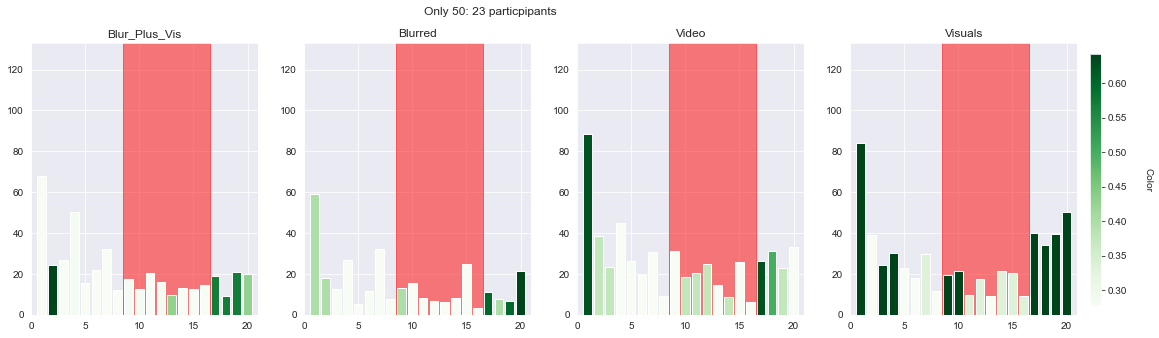

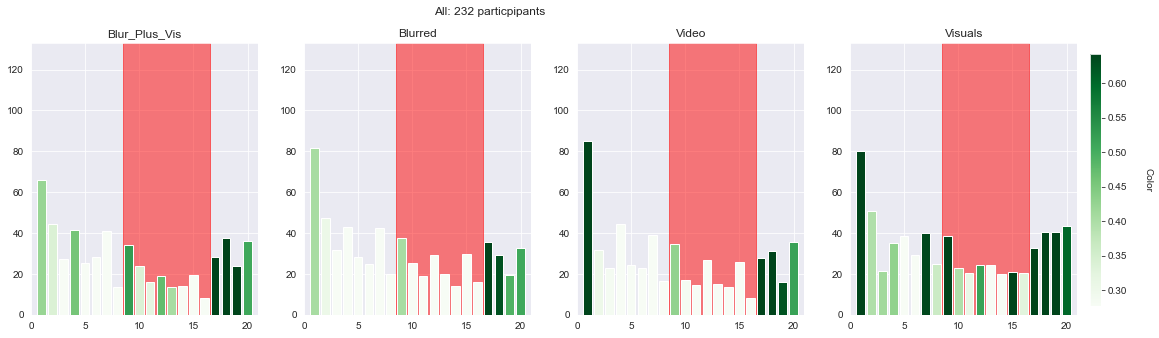

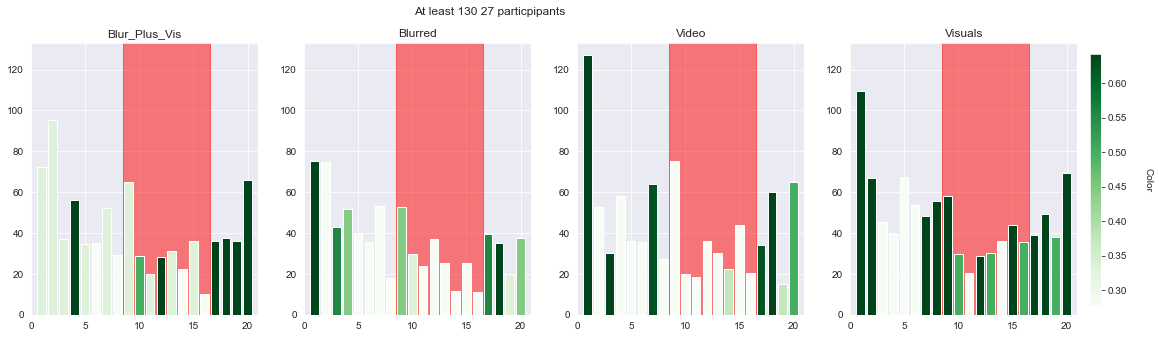

In [15]:
# Can I plot time on row for questions only to average correct for each visual?
sns.set_style('darkgrid')
chosenMap = 'Greens'


# less than 50%

# Can I plot time on row for questions only to average correct for each visual?
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5)) # create figure and axes
thisDF = Only50.copy()
from matplotlib.cm import ScalarMappable
for v_index, vis in enumerate(sorted(thisDF.VisCond.unique())):
    temp = thisDF[thisDF['VisCond']==vis].query('Question!=0')
    tmp1 = temp.groupby(['Question']).mean()
    #get correct average for all together?
    tmp2 = tmp_taskDF.query('Question!=0').groupby(['AgentNum']).mean()
#     print(tmp1['Correct'])
    my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
    my_cmap = plt.cm.get_cmap(chosenMap)
#     tmp1[['TimeOnRow']].plot(kind="bar", color=my_cmap(my_norm(tmp1.Correct.values)))
    
#     plt.show()
    
    tmp1.index.names=['Question']
    axes[v_index].axvspan(8.5, 16.5, alpha=0.5, color='red')
    axes[v_index].bar(x=tmp1.index, height="TimeOnRow", data=tmp1, color=my_cmap(my_norm(tmp1.Correct.values)))
    axes[v_index].set_title(vis)
    axes[v_index].set_xlim((0,21))
    axes[v_index].set_ylim((0,133))
    
fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Color', rotation=270,labelpad=25)
fig.suptitle("Only 50: " + str(len(thisDF.ParticipantPublicID.unique())) + " particpipants")
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5)) # create figure and axes
thisDF = tmp_taskDF.copy()
from matplotlib.cm import ScalarMappable
for v_index, vis in enumerate(sorted(thisDF.VisCond.unique())):
    temp = thisDF[thisDF['VisCond']==vis].query('Question!=0')
    tmp1 = temp.groupby(['Question']).mean()
    #get correct average for all together?
    tmp2 = thisDF.groupby(['Question']).mean()
#     print(tmp1['Correct'])
#     my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
#     my_cmap = plt.cm.get_cmap(chosenMap)
#     tmp1[['TimeOnRow']].plot(kind="bar", color=my_cmap(my_norm(tmp1.Correct.values)))
    
#     plt.show()
    
    tmp1.index.names=['Question']
    axes[v_index].axvspan(8.5, 16.5, alpha=0.5, color='red')
    axes[v_index].bar(x=tmp1.index, height="TimeOnRow", data=tmp1, color=my_cmap(my_norm(tmp1.Correct.values)))
    axes[v_index].set_title(vis)
    axes[v_index].set_xlim((0,21))
    axes[v_index].set_ylim((0,133))
    
fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Color', rotation=270,labelpad=25)
fig.suptitle("All: " + str(len(thisDF.ParticipantPublicID.unique())) + " particpipants")
plt.show()



# more than 120%

# Can I plot time on row for questions only to average correct for each visual?
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5)) # create figure and axes
thisDF = AtLeast130.copy()
from matplotlib.cm import ScalarMappable
for v_index, vis in enumerate(sorted(thisDF.VisCond.unique())):
    temp = thisDF[thisDF['VisCond']==vis].query('Question!=0')
    tmp1 = temp.groupby(['Question']).mean()
    #get correct average for all together?
    tmp2 = thisDF.groupby(['Question']).mean()
#     print(tmp1['Correct'])
#     my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
#     my_cmap = plt.cm.get_cmap('GnBu')
#     tmp1[['TimeOnRow']].plot(kind="bar", color=my_cmap(my_norm(tmp1.Correct.values)))
    
#     plt.show()
    
    tmp1.index.names=['Question']
    axes[v_index].axvspan(8.5, 16.5, alpha=0.5, color='red')
    axes[v_index].bar(x=tmp1.index, height="TimeOnRow", data=tmp1, color=my_cmap(my_norm(tmp1.Correct.values)))
    axes[v_index].set_title(vis)
    axes[v_index].set_xlim((0,21))
    axes[v_index].set_ylim((0,133))
    
fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Color', rotation=270,labelpad=25)
fig.suptitle("At least 130 " + str(len(thisDF.ParticipantPublicID.unique())) + " particpipants")
plt.show()

#Insight: People more likely to get first prediction Q right. Maybe compare just across those? 
# Or average across all three and compare that? 
# Insight: Engaging with video clips alone not really helpful but is time-consuming
# Those who engaged with video clips only very little has least white bars
# I think we can make an argument that video clips are a quick and easy way to transfer a limitted
# amount of info, but that the charts are a good addition, too, especially for more complex Qs
# And/Or for situations where the user has more time to sit and study them?

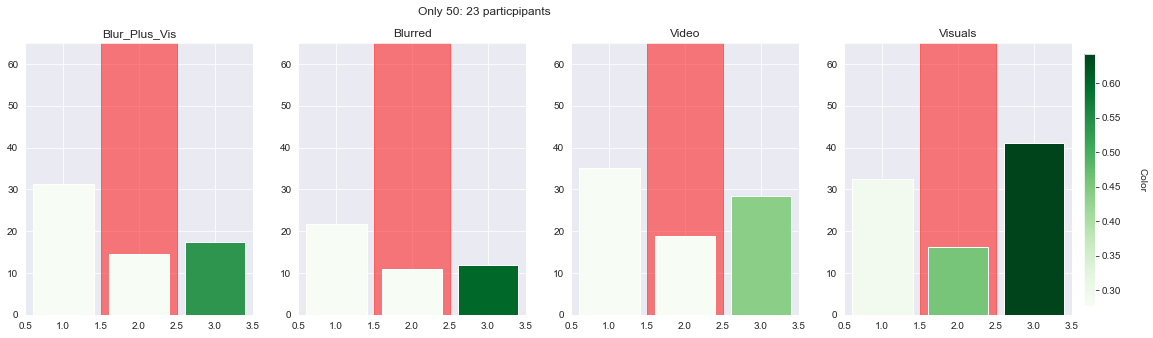

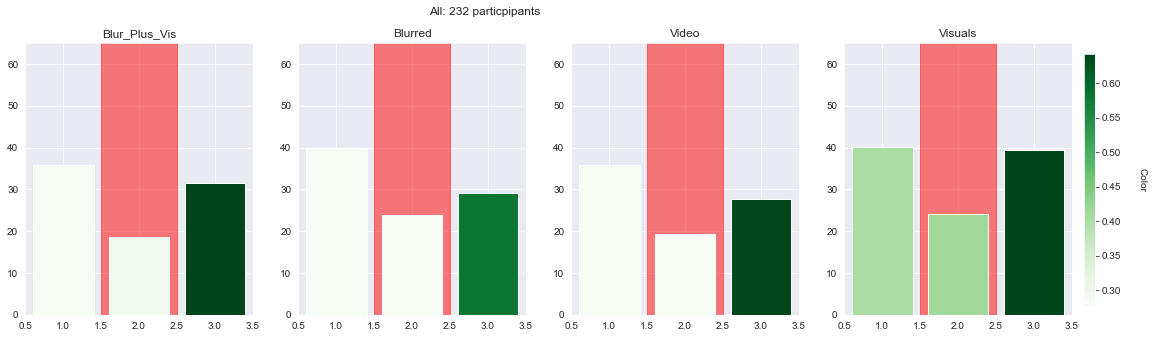

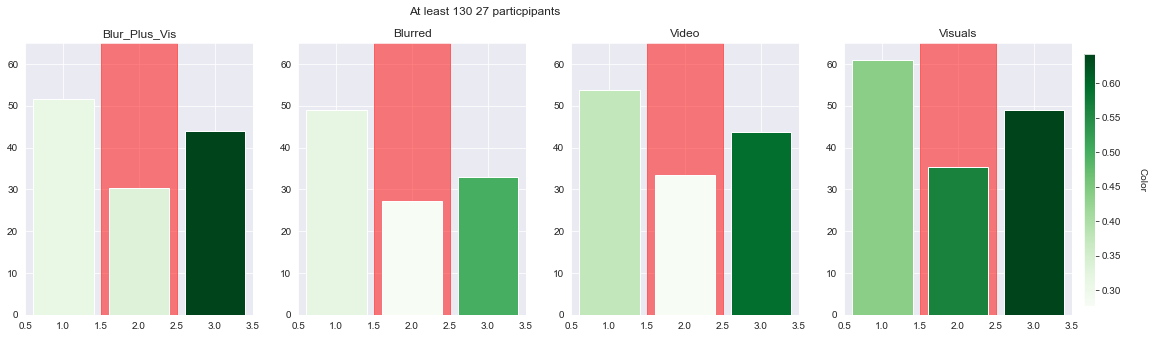

In [88]:
# Can I plot time on row for questions only to average correct for each visual?
sns.set_style('darkgrid')
chosenMap = 'Greens'


# less than 50%

# Can I plot time on row for questions only to average correct for each visual?
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5)) # create figure and axes
thisDF = Only50.copy()
from matplotlib.cm import ScalarMappable
for v_index, vis in enumerate(sorted(thisDF.VisCond.unique())):
    temp = thisDF[thisDF['VisCond']==vis].query('Question!=0')
    tmp1 = temp.groupby(['AgentNum']).mean()
    #get correct average for all together?
    tmp2 = tmp_taskDF.query('Question!=0').groupby(['AgentNum']).mean()
#     print(tmp2['Correct'])
    my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
    my_cmap = plt.cm.get_cmap(chosenMap)
#     tmp1[['TimeOnRow']].plot(kind="bar", color=my_cmap(my_norm(tmp1.Correct.values)))
    
#     plt.show()
    
    tmp1.index.names=['AgentNum']
    axes[v_index].axvspan(1.5,2.5, alpha=0.5, color='red')
    axes[v_index].bar(x=tmp1.index, height="TimeOnRow", data=tmp1, color=my_cmap(my_norm(tmp1.Correct.values)))
    axes[v_index].set_title(vis)
    axes[v_index].set_xlim((0.5,3.5))
    axes[v_index].set_ylim((0,65))
    
fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Color', rotation=270,labelpad=25)
fig.suptitle("Only 50: " + str(len(thisDF.ParticipantPublicID.unique())) + " particpipants")
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5)) # create figure and axes
thisDF = tmp_taskDF.copy()
from matplotlib.cm import ScalarMappable
for v_index, vis in enumerate(sorted(thisDF.VisCond.unique())):
    temp = thisDF[thisDF['VisCond']==vis].query('Question!=0')
    tmp1_all = temp.groupby(['AgentNum']).mean()
    #get correct average for all together?
    tmp2 = thisDF.groupby(['AgentNum']).mean()
#     my_norm = plt.Normalize(tmp1.Correct.min(), tmp1.Correct.max())
#     print(tmp1['Correct'])
#     my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
#     my_cmap = plt.cm.get_cmap(chosenMap)
#     tmp1[['TimeOnRow']].plot(kind="bar", color=my_cmap(my_norm(tmp1.Correct.values)))
    
#     plt.show()
#     print("\n")
#     print(vis)
#     print(tmp1_all[['Correct','TimeOnRow']])
    tmp1_all.index.names=['AgentNum']
    axes[v_index].axvspan(1.5,2.5, alpha=0.5, color='red')
    axes[v_index].bar(x=tmp1_all.index, height="TimeOnRow", data=tmp1_all, color=my_cmap(my_norm(tmp1_all.Correct.values)))
    axes[v_index].set_title(vis)
    axes[v_index].set_xlim((0.5,3.5))
    axes[v_index].set_ylim((0,65))
    
fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Color', rotation=270,labelpad=25)
fig.suptitle("All: " + str(len(thisDF.ParticipantPublicID.unique())) + " particpipants")
plt.show()



# more than 120%

# Can I plot time on row for questions only to average correct for each visual?
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,5)) # create figure and axes
thisDF = AtLeast130.copy()
from matplotlib.cm import ScalarMappable
for v_index, vis in enumerate(sorted(thisDF.VisCond.unique())):
    temp = thisDF[thisDF['VisCond']==vis].query('Question!=0')
    tmp1_130 = temp.groupby(['AgentNum']).mean()
    #get correct average for all together?
    tmp2 = thisDF.groupby(['AgentNum']).mean()
#     my_norm = plt.Normalize(tmp1.Correct.min(), tmp1.Correct.max())
#     print(tmp1['Correct'])
#     my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
#     my_cmap = plt.cm.get_cmap('GnBu')
#     tmp1[['TimeOnRow']].plot(kind="bar", color=my_cmap(my_norm(tmp1.Correct.values)))
    
#     plt.show()
#     print("\n")
#     print(vis)
#     print(tmp1_130[['Correct','TimeOnRow']])
    tmp1_130.index.names=['AgentNum']
    axes[v_index].axvspan(1.5,2.5, alpha=0.5, color='red')
    axes[v_index].bar(x=tmp1_130.index, height="TimeOnRow", data=tmp1_130, color=my_cmap(my_norm(tmp1_130.Correct.values)))
    axes[v_index].set_title(vis)
    axes[v_index].set_xlim((0.5,3.5))
    axes[v_index].set_ylim((0,65))
    
fig.subplots_adjust(right=0.98)
cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
sm.set_array([])

cbar = plt.colorbar(sm, cax=cbar_ax)
cbar.set_label('Color', rotation=270,labelpad=25)
fig.suptitle("At least 130 " + str(len(thisDF.ParticipantPublicID.unique())) + " particpipants")
plt.show()

#Insight: People more likely to get first prediction Q right. Maybe compare just across those? 
# Or average across all three and compare that? 
# Insight: Engaging with video clips alone not really helpful but is time-consuming
# Those who engaged with video clips only very little has least white bars
# I think we can make an argument that video clips are a quick and easy way to transfer a limitted
# amount of info, but that the charts are a good addition, too, especially for more complex Qs
# And/Or for situations where the user has more time to sit and study them?

In [86]:
for v_index, vis in enumerate(tmp_taskDF.VisCond.unique()):
    
    tmp1 = Only30[Only30['VisCond']==vis]
    tmp2 = AtLeast130[AtLeast130['VisCond']==vis]
    
    
    firstDF = tmp1.query('AgentNum!=0 & Question!=0').groupby(['AgentNum']).mean().copy()
    secondDF = tmp2.query('AgentNum!=0 & Question!=0').groupby(['AgentNum']).mean().copy()

    firstDF.index.names=['AgentNum']
    secondDF.index.names=['AgentNum']
    firstDF['Correct'] = firstDF['Correct']*100
    secondDF['Correct'] = secondDF['Correct']*100

    secondDF['Improve'] = (secondDF['Correct']-firstDF['Correct'])/(secondDF['TimeOnRow']-firstDF['TimeOnRow'])
    print(".......................................")
    print(vis)
#     print("correct: ")
#     print(secondDF['Correct']-firstDF['Correct'])
    print("time: ")
    print(secondDF['TimeOnRow']-firstDF['TimeOnRow'])
    print(">>>>BEtter")
    print(secondDF[['Improve']])

.......................................
Blur_Plus_Vis
time: 
AgentNum
1.0    27.129043
2.0    16.194262
3.0    31.224221
Name: TimeOnRow, dtype: float64
>>>>BEtter
           Improve
AgentNum          
1.0       0.383967
2.0       0.257293
3.0       1.467878
.......................................
Visuals
time: 
AgentNum
1.0    33.853364
2.0    21.865299
3.0     6.922985
Name: TimeOnRow, dtype: float64
>>>>BEtter
           Improve
AgentNum          
1.0       0.923099
2.0      -0.285841
3.0       5.416739
.......................................
Blurred
time: 
AgentNum
1.0    28.107409
2.0    17.902050
3.0    20.102833
Name: TimeOnRow, dtype: float64
>>>>BEtter
           Improve
AgentNum          
1.0       0.543550
2.0      -0.310331
3.0      -0.414535
.......................................
Video
time: 
AgentNum
1.0    23.843552
2.0    19.437882
3.0    23.551432
Name: TimeOnRow, dtype: float64
>>>>BEtter
           Improve
AgentNum          
1.0       0.524251
2.0      -0.080384
3.0

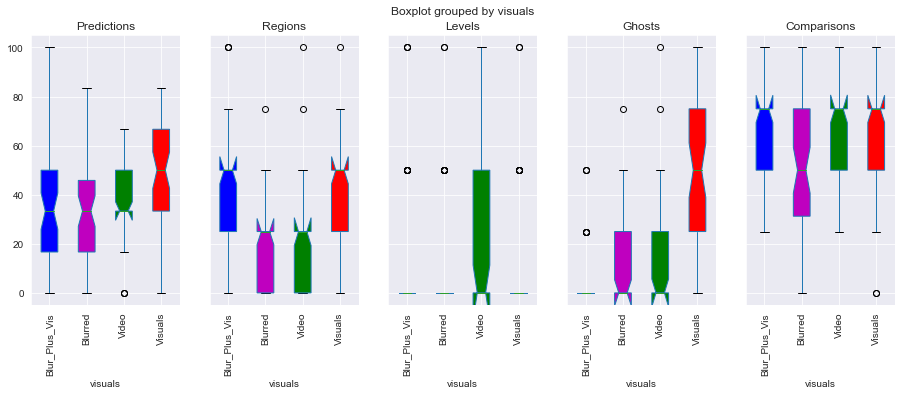

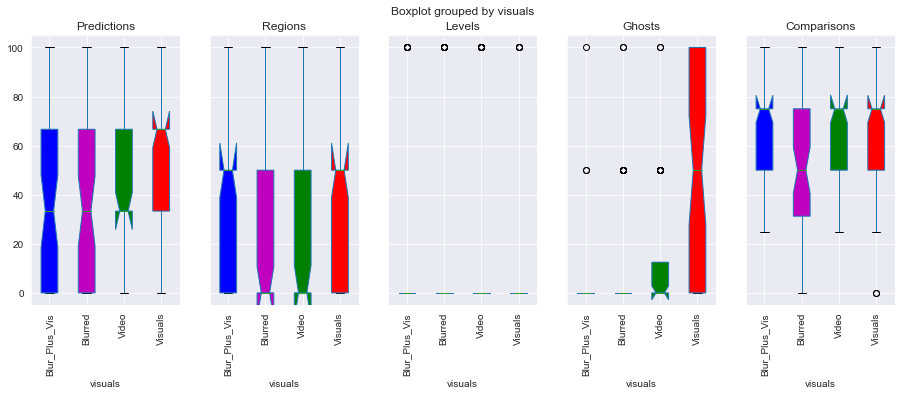

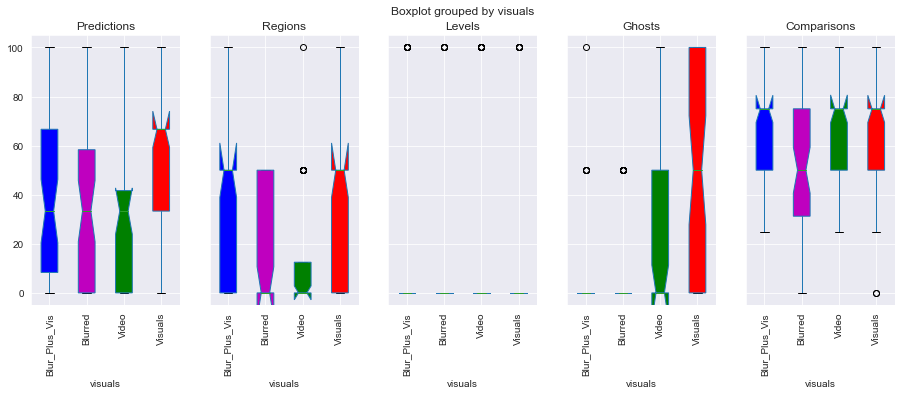

In [53]:
thisDF = tmp_slimDF.copy()

# What if we drop all who played the video less than average? 
#  'vidPlayed', 'avgVidPlays', 
import matplotlib

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True) # create figure and axes

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='predPerc',by='visuals', ax=axes[0], rot=90, return_type='both', patch_artist = True, notch=True)
axes[0].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[0].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[0].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[0].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[0].set_title("Predictions")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='regPerc',by='visuals', ax=axes[1], rot=90, return_type='both', patch_artist = True, notch=True)
axes[1].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[1].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[1].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[1].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[1].set_title("Regions")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='lvlPerc',by='visuals', ax=axes[2], rot=90, return_type='both', patch_artist = True, notch=True)
axes[2].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[2].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[2].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[2].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[2].set_title("Levels")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='ghostPerc',by='visuals', ax=axes[3], rot=90, return_type='both', patch_artist = True, notch=True)
axes[3].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[3].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[3].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[3].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[3].set_title("Ghosts")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='compPerc',by='visuals', ax=axes[4], rot=90, return_type='both', patch_artist = True, notch=True)
axes[4].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[4].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[4].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[4].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[4].set_title("Comparisons")
plt.show()

# insight: highlights most helpful for giving an estimate of agent's ability to reach level 2
# Visuals clearly better for local question of prediction, and for global question RE: ghosts











fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True) # create figure and axes

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='pred1Perc',by='visuals', ax=axes[0], rot=90, return_type='both', patch_artist = True, notch=True)
axes[0].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[0].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[0].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[0].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[0].set_title("Predictions")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='reg1Perc',by='visuals', ax=axes[1], rot=90, return_type='both', patch_artist = True, notch=True)
axes[1].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[1].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[1].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[1].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[1].set_title("Regions")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='lvl1Perc',by='visuals', ax=axes[2], rot=90, return_type='both', patch_artist = True, notch=True)
axes[2].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[2].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[2].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[2].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[2].set_title("Levels")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='ghost1Perc',by='visuals', ax=axes[3], rot=90, return_type='both', patch_artist = True, notch=True)
axes[3].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[3].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[3].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[3].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[3].set_title("Ghosts")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='compPerc',by='visuals', ax=axes[4], rot=90, return_type='both', patch_artist = True, notch=True)
axes[4].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[4].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[4].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[4].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[4].set_title("Comparisons")
plt.show()
























fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15,5), sharey=True) # create figure and axes

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='pred2Perc',by='visuals', ax=axes[0], rot=90, return_type='both', patch_artist = True, notch=True)
axes[0].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[0].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[0].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[0].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[0].set_title("Predictions")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='reg2Perc',by='visuals', ax=axes[1], rot=90, return_type='both', patch_artist = True, notch=True)
axes[1].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[1].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[1].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[1].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[1].set_title("Regions")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='lvl2Perc',by='visuals', ax=axes[2], rot=90, return_type='both', patch_artist = True, notch=True)
axes[2].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[2].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[2].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[2].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[2].set_title("Levels")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='ghost2Perc',by='visuals', ax=axes[3], rot=90, return_type='both', patch_artist = True, notch=True)
axes[3].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[3].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[3].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[3].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[3].set_title("Ghosts")
# plt.show()

ls = []
for p_index, pID in enumerate(thisDF.ParticipantPublicID.unique()):
    temp = tmp_slimDF[tmp_slimDF['ParticipantPublicID']==pID]
    if (temp.ratioVidPlaysToAvg.unique()[0]<60):
        ls.append(pID) 
tmp_slimDF_3 = thisDF[~thisDF['ParticipantPublicID'].isin(ls)].copy()
tmp_slimDF_3.boxplot(column='compPerc',by='visuals', ax=axes[4], rot=90, return_type='both', patch_artist = True, notch=True)
axes[4].findobj(matplotlib.patches.Patch)[0].set_facecolor("b")
axes[4].findobj(matplotlib.patches.Patch)[1].set_facecolor("m")
axes[4].findobj(matplotlib.patches.Patch)[2].set_facecolor("g")
axes[4].findobj(matplotlib.patches.Patch)[3].set_facecolor("r")
# set your own proper title
axes[4].set_title("Comparisons")
plt.show()

In [18]:
# Can we break the bars apart into: Visuals, Engagement, AgentNum, and type of Question? 
print(tmp_taskDF.display.unique())

[None 'Vis' 'GameEGs' 'TextScreen' 'Img_4_Buttons' 'Prediction' 'Regions'
 'NextLvl' '6_buttons' 'likerts' 'CompareSectionVideoOnly'
 'CompareConfidenceVidOnly' 'CompareTextEntry' 'AttnCheck' 'WrapUpLikert'
 'Attn2' 'Attn1']



....Only50 1 Prediction
                Correct
VisCond                
Blur_Plus_Vis  0.333333
Blurred        0.333333
Video          0.458333
Visuals        0.444444

....tmp_taskDF 1 Prediction
                Correct
VisCond                
Blur_Plus_Vis  0.338983
Blurred        0.310734
Video          0.410714
Visuals        0.488506

....AtLeast130 1 Prediction
                Correct
VisCond                
Blur_Plus_Vis  0.333333
Blurred        0.518519
Video          0.625000
Visuals        0.500000

....Only50 2 Prediction
                Correct
VisCond                
Blur_Plus_Vis  0.238095
Blurred        0.266667
Video          0.333333
Visuals        0.777778

....tmp_taskDF 2 Prediction
                Correct
VisCond                
Blur_Plus_Vis  0.395480
Blurred        0.299435
Video          0.315476
Visuals        0.471264

....AtLeast130 2 Prediction
                Correct
VisCond                
Blur_Plus_Vis  0.388889
Blurred        0.259259
Video          0.1

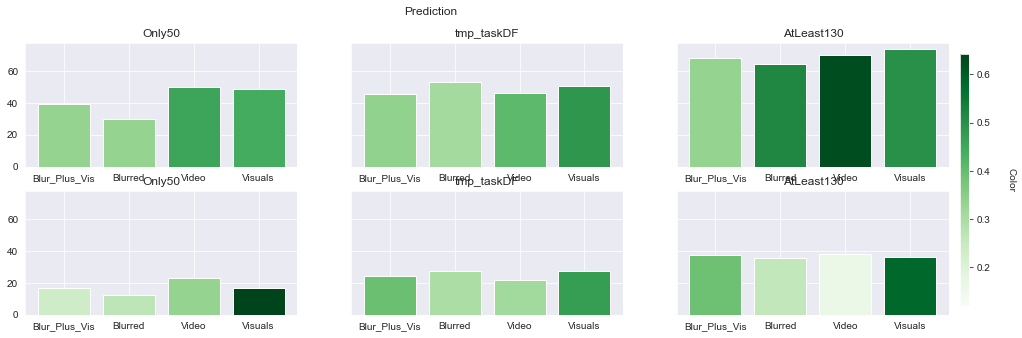

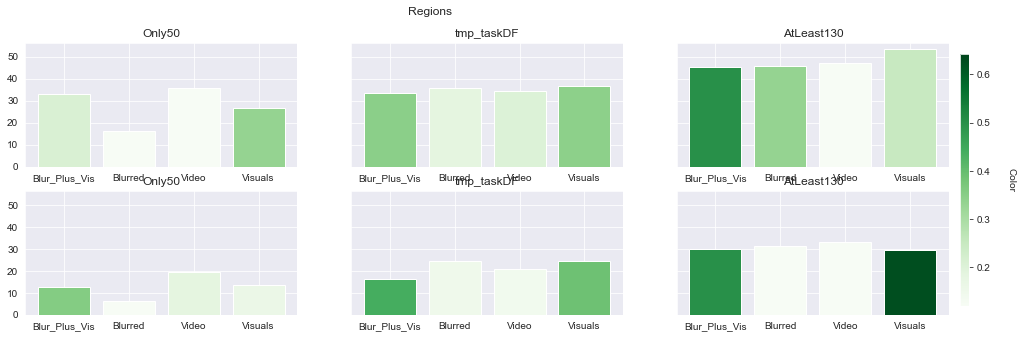

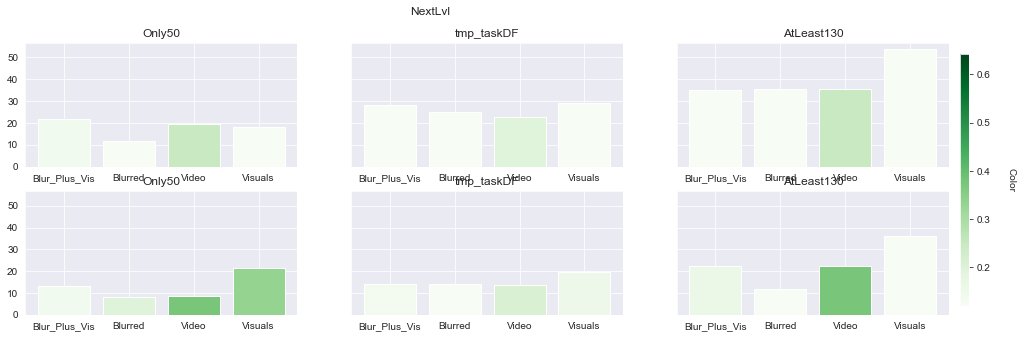

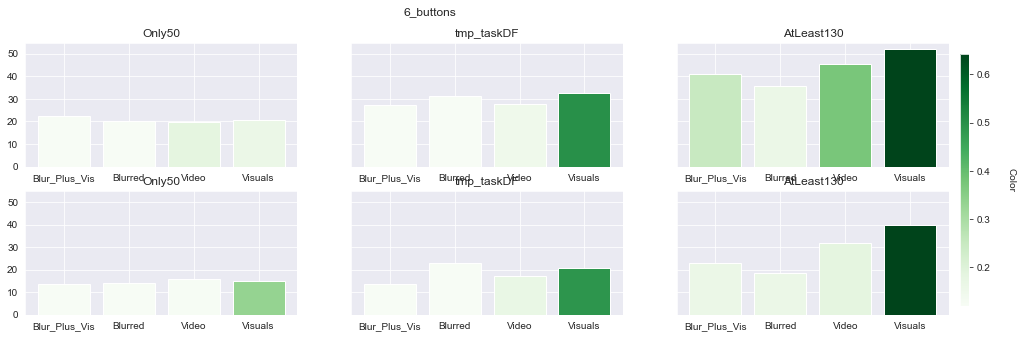

In [39]:
#'predictionsCorrect', 'predictions1Correct', 'predictions2Correct', 'regionsCorrect', 'regions1Correct',
#'regions2Correct', 'levelCorrect', 'level1Correct', 'level2Correct', 'ghostsCorrect', 'ghosts1Correct',
#'ghosts2Correct'


dfList = [Only50,tmp_taskDF,AtLeast130]
dfStringList = ["Only50","tmp_taskDF","AtLeast130"]
dispList = ['Prediction', 'Regions', 'NextLvl', '6_buttons']
aList = [1,2]
            
# for each visual, for each display, for each             
for dis_index, disp in enumerate(dispList):
    # set up figure to compare the 3 graphs
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,5), sharey=True) # create figure and axes
    for a_index, aNum in enumerate(aList):
        tmp2 = tmp_taskDF.query('Question!=0')
        tmp2 = tmp2.groupby(['AgentNum','display']).mean()
#         print(tmp2[['Correct']])
        my_norm = plt.Normalize(tmp2.Correct.min(), tmp2.Correct.max())
        my_cmap = plt.cm.get_cmap(chosenMap)
        for df_index, df in enumerate(dfList):
            temp1 = df.query('Question!=0').copy()
            temp2 = temp1[(temp1['display']==disp) & (temp1['AgentNum']==aNum)].copy()
            temp3 = temp2.groupby('VisCond').mean()
            
            temp3.index.names=['VisCond']
            print("\n...." + str(dfStringList[df_index]) + " " + str(aNum) + " " + str(disp))
            print(temp3[['Correct']])
            axes[a_index,df_index].bar(x=temp3.index, height="TimeOnRow", data=temp3, color=my_cmap(my_norm(temp3.Correct.values)))
            axes[a_index,df_index].set_title(dfStringList[df_index])
    fig.suptitle(disp)
    fig.subplots_adjust(right=0.98)
    cbar_ax = fig.add_axes([0.99, 0.15, 0.009, 0.7])
    sm = ScalarMappable(cmap=my_cmap, norm=my_norm)
    sm.set_array([])

    cbar = plt.colorbar(sm, cax=cbar_ax)
    cbar.set_label('Color', rotation=270,labelpad=25)
                        
# Insight: Those who engaged very little did really well on second-agent predictions. In general
# second agent answers were equal or better for visuals. 
# For blurred alone we almost never see improvement in the second agent, just the same
# For other visual conditions it is a mixed bag

In [20]:
thisDF = Only50.copy()
tmp = thisDF.query('Question != 0 & AgentNum == 2 & display == "Prediction"')
print(tmp.groupby('VisCond').mean()[['Correct']])

print(len(tmp[tmp['VisCond']=="Visuals"].ParticipantPublicID.unique()))
print(len(tmp[tmp['VisCond']=="Video"].ParticipantPublicID.unique()))
print(len(tmp[tmp['VisCond']=="Blur_Plus_Vis"].ParticipantPublicID.unique()))
print(len(tmp[tmp['VisCond']=="Blurred"].ParticipantPublicID.unique()))

                Correct
VisCond                
Blur_Plus_Vis  0.238095
Blurred        0.266667
Video          0.333333
Visuals        0.777778
3
8
7
5


['Difficult' 'Easy']


Text(0.5, 0.98, 'Plays Engagement Compared to Average')

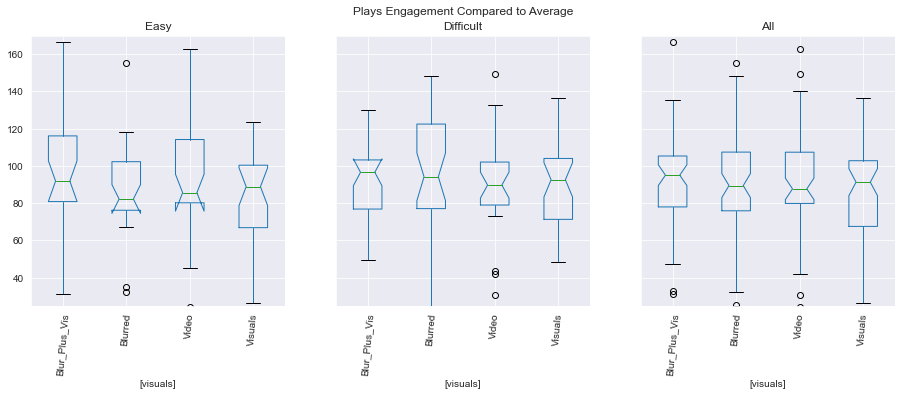

In [21]:
# SO let's make a boxplot of engagement versus visuals?
print(tmp_slimDF.difficulty.unique())
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True) # create figure and axes
tmp_slimDF[tmp_slimDF['difficulty']=="Easy"].boxplot(column=['ratioVidPlaysToAvg'],by=['visuals'], notch=True, rot=85, ax=axes[0])
axes[0].set_ylim(25,170)
axes[0].set_title("Easy")
tmp_slimDF[tmp_slimDF['difficulty']=="Difficult"].boxplot(column=['ratioVidPlaysToAvg'],by=['visuals'], notch=True, rot=85, ax=axes[1])
axes[1].set_ylim(25,170)
axes[1].set_title("Difficult")

tmp_slimDF.boxplot(column=['ratioVidPlaysToAvg'],by=['visuals'], rot=85, ax=axes[2], notch=True)
axes[2].set_ylim(25,170)
axes[2].set_title("All")

fig.suptitle("Plays Engagement Compared to Average")

#Insight: range of interaction Across conditions is not wildly different

In [22]:
print(slimDF.columns.tolist())

['ParticipantPrivateID', 'difficulty', 'visuals', 'agents', 'QsTotal', 'QsCorrect', 'Qs1_Correct', 'Qs2_Correct', 'QsPart_Total', 'predictionsCorrect', 'predictionsTotal', 'predictions1Correct', 'predictions2Correct', 'predictionsHalfTotal', 'regionsCorrect', 'regionsTotal', 'regions1Correct', 'regions2Correct', 'regionsHalfTotal', 'levelCorrect', 'levelTotal', 'level1Correct', 'level2Correct', 'levelHalfTotal', 'ghostsCorrect', 'ghostsTotal', 'ghosts1Correct', 'ghosts2Correct', 'ghostsHalfTotal', 'comparisonsCorrect', 'comparisonsTotal', 'timeTakenMain_All', 'timeTakenMain_AgentsOnly', 'timeTaken_Consent', 'timeTaken_Demographics', 'timeTaken_AI', 'timeTaken_Agent1', 'timeTaken_Agent2', 'timeTaken_Agent3', 'time_TOTAL', 'vidPlayed', 'avgVidPlays', 'ratioVidPlaysToAvg', 'ExperimentVersion_x', 'totPerc', 'tot1Perc', 'tot2Perc', 'predPerc', 'pred1Perc', 'pred2Perc', 'regPerc', 'reg1Perc', 'reg2Perc', 'lvlPerc', 'lvl1Perc', 'lvl2Perc', 'ghostPerc', 'ghost1Perc', 'ghost2Perc', 'compPerc', 

['Difficult' 'Easy']
['Difficult' 'Easy']
['Difficult' 'Easy']
['Difficult' 'Easy']


Text(0.5, 0.98, 'Agent Only Time Engagement Compared to Average')

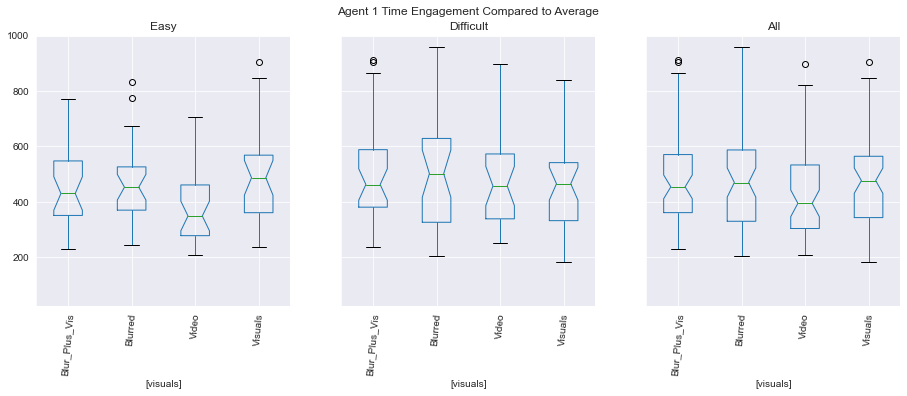

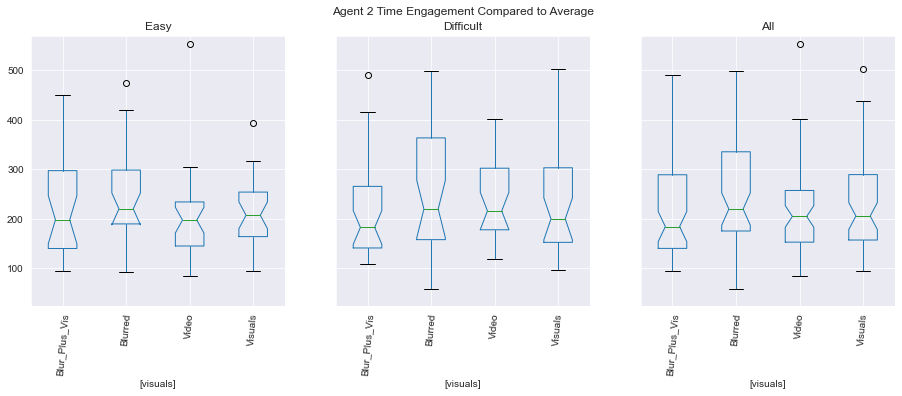

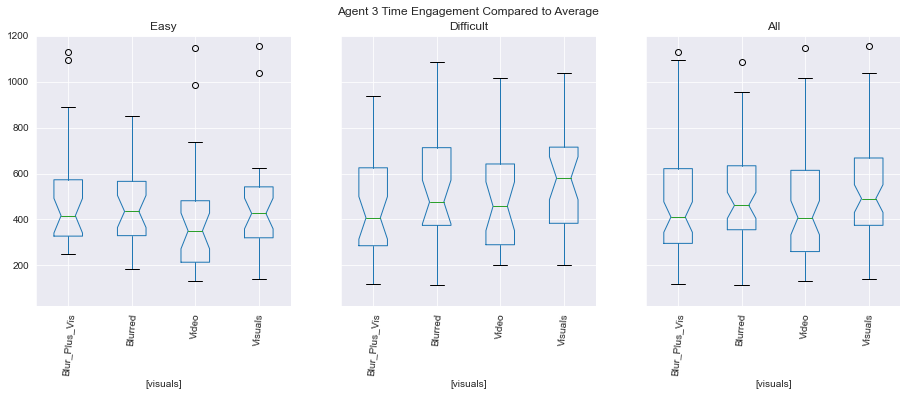

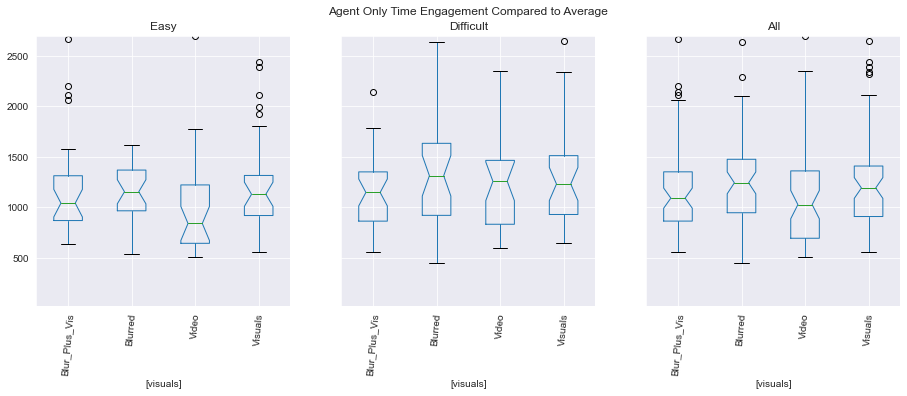

In [23]:
# SO let's make a boxplot of time spent versus visuals?
print(tmp_slimDF.difficulty.unique())
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True) # create figure and axes
tmp_slimDF[tmp_slimDF['difficulty']=="Easy"].boxplot(column=['timeTaken_Agent1'],by=['visuals'], notch=True, rot=85, ax=axes[0])
axes[0].set_ylim(25,1000)
axes[0].set_title("Easy")
tmp_slimDF[tmp_slimDF['difficulty']=="Difficult"].boxplot(column=['timeTaken_Agent1'],by=['visuals'], notch=True, rot=85, ax=axes[1])
axes[1].set_ylim(25,1000)
axes[1].set_title("Difficult")

tmp_slimDF.boxplot(column=['timeTaken_Agent1'],by=['visuals'], rot=85, ax=axes[2], notch=True)
axes[2].set_ylim(25,1000)
axes[2].set_title("All")

fig.suptitle("Agent 1 Time Engagement Compared to Average")


# SO let's make a boxplot of time spent versus visuals?
print(tmp_slimDF.difficulty.unique())
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True) # create figure and axes
tmp_slimDF[tmp_slimDF['difficulty']=="Easy"].boxplot(column=['timeTaken_Agent2'],by=['visuals'], notch=True, rot=85, ax=axes[0])
axes[0].set_ylim(25,570)
axes[0].set_title("Easy")
tmp_slimDF[tmp_slimDF['difficulty']=="Difficult"].boxplot(column=['timeTaken_Agent2'],by=['visuals'], notch=True, rot=85, ax=axes[1])
axes[1].set_ylim(25,570)
axes[1].set_title("Difficult")

tmp_slimDF.boxplot(column=['timeTaken_Agent2'],by=['visuals'], rot=85, ax=axes[2], notch=True)
axes[2].set_ylim(25,570)
axes[2].set_title("All")

fig.suptitle("Agent 2 Time Engagement Compared to Average")


# SO let's make a boxplot of time spent versus visuals?
print(tmp_slimDF.difficulty.unique())
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True) # create figure and axes
tmp_slimDF[tmp_slimDF['difficulty']=="Easy"].boxplot(column=['timeTaken_Agent3'],by=['visuals'], notch=True, rot=85, ax=axes[0])
axes[0].set_ylim(25,1200)
axes[0].set_title("Easy")
tmp_slimDF[tmp_slimDF['difficulty']=="Difficult"].boxplot(column=['timeTaken_Agent3'],by=['visuals'], notch=True, rot=85, ax=axes[1])
axes[1].set_ylim(25,1200)
axes[1].set_title("Difficult")

tmp_slimDF.boxplot(column=['timeTaken_Agent3'],by=['visuals'], rot=85, ax=axes[2], notch=True)
axes[2].set_ylim(25,1200)
axes[2].set_title("All")

fig.suptitle("Agent 3 Time Engagement Compared to Average")


# SO let's make a boxplot of time spent versus visuals?
print(tmp_slimDF.difficulty.unique())
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True) # create figure and axes
tmp_slimDF[tmp_slimDF['difficulty']=="Easy"].boxplot(column=['timeTakenMain_AgentsOnly'],by=['visuals'], notch=True, rot=85, ax=axes[0])
axes[0].set_ylim(25,2700)
axes[0].set_title("Easy")
tmp_slimDF[tmp_slimDF['difficulty']=="Difficult"].boxplot(column=['timeTakenMain_AgentsOnly'],by=['visuals'], notch=True, rot=85, ax=axes[1])
axes[1].set_ylim(25,2700)
axes[1].set_title("Difficult")

tmp_slimDF.boxplot(column=['timeTakenMain_AgentsOnly'],by=['visuals'], rot=85, ax=axes[2], notch=True)
axes[2].set_ylim(25,2700)
axes[2].set_title("All")

fig.suptitle("Agent Only Time Engagement Compared to Average")

# Insight: for EASY comparisons, video-only participants were the only 
# ones who went significantly faster, and that mostly comes from going quickly
# through agent 1 questions, as agent 2 and 3 see it not have sig. diff. anymore
# Even then, its 95 range still overlaps some with blur plus vis

In [50]:
# boxplot of confiences? 
print(tmp_taskDF.columns.tolist())
print(tmp_taskDF[tmp_taskDF['CompConf']!=0][['Correct','Text1','CompConf','Response']])

['EventIndex', 'UTCTimestamp', 'UTCDate', 'LocalTimestamp', 'LocalTimezone', 'LocalDate', 'ExperimentID', 'ExperimentVersion', 'TreeNodeKey', 'RepeatKey', 'ScheduleID', 'ParticipantPublicID', 'ParticipantPrivateID', 'ParticipantStartingGroup', 'ParticipantStatus', 'ParticipantCompletionCode', 'ParticipantExternalSessionID', 'ParticipantDeviceType', 'ParticipantDevice', 'ParticipantOS', 'ParticipantBrowser', 'ParticipantMonitorSize', 'ParticipantViewportSize', 'Checkpoint', 'TaskName', 'TaskVersion', 'VisCond_DIFF', 'AgentCond_BlurVis_DIFF', 'AgentCond_Vis_DIFF', 'AgentCond_Blur_DIFF', 'checkpoint_ph4w', 'checkpoint_drrq', 'AgentCond_Norm_DIFF', 'checkpoint_6gsl', 'checkpoint_apgi', 'LVL', 'VisCond_EASY', 'AgentCond_Norm_EASY', 'AgentCond_Vis_EASY', 'AgentCond_BlurVis_EASY', 'AgentCond_Blur_EASY', 'Spreadsheet', 'SpreadsheetName', 'SpreadsheetRow', 'TrialNumber', 'ScreenNumber', 'ScreenName', 'ZoneName', 'ZoneType', 'ReactionTime', 'ReactionOnset', 'ResponseType', 'Response', 'Attempt',

TypeError: unsupported operand type(s) for /: 'str' and 'int'

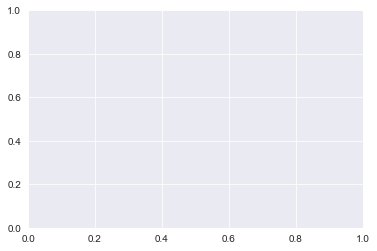

In [49]:
tmp_taskDF[tmp_taskDF['CompConf']!=0].boxplot(column=['Response'],by=['VisCond'], notch=True, rot=85)